In [6]:
import numpy as np
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2, u1, u2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * x1 + u1 * x1**3 + k2 * (x2 - x1) + u2 * (x1 - x2)**3) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1) + u2 * (x2 - x1)**3) / m2]
    return f

In [7]:
#Usamos la funcion ODEINT para resolver las ecuaciones diferenciales definidas por el vector
from scipy.integrate import odeint

# Value of parameters
# Masses:
m1 = 1.0
m2 = 1.0
# spring constants 
k1 = 0.4
k2 = 1.808
# natural lenghts
L1 = 0.0
L2 = 0.0
# Friction coeficients
b1 = 0.0
b2 = 0.0

u1 = -(1.0/6.0)
u2 = -(1.0/10.0)

w1 = 0.0
w2 = 0.0

# Initial conditions
x1 = -0.5
y1 = 0.5
x2 = 3.001
y2 = 5.9

# Parametros de la ED
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 200.0
numpoints = 2150

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2, u1, u2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('two_springs2.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print (t1, w1[0], w1[1], w1[2], w1[3],file=f)

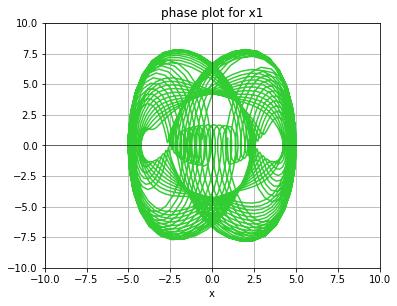

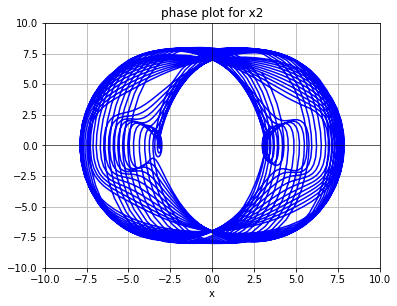

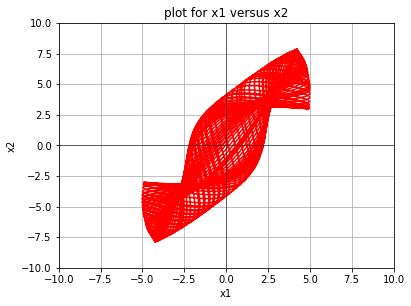

In [15]:
import numpy 
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, ylabel
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('two_springs2.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('x')
grid(True)
lw = 1.5

plot(x1, y1, 'limegreen', linewidth=lw)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.xlim(-10,10)
plt.ylim(-10,10)

title('phase plot for x1')
savefig('ej3_21.png', dpi=100)

####################################################


figure(2, figsize=(6, 4.5))

xlabel('x')
grid(True)
lw = 1.5

plot(x2, y2, 'blue', linewidth=lw)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.xlim(-10,10)
plt.ylim(-10,10)

title('phase plot for x2')
savefig('ej3_22.png', dpi=100)

###########################################

figure(3, figsize=(6, 4.5))

xlabel('x1')
ylabel('x2')
grid(True)
lw = 1.5

plot(x1, x2, 'red', linewidth=lw)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.xlim(-10,10)
plt.ylim(-10,10)

title('plot for x1 versus x2')
savefig('ej3_23.png', dpi=100)

